# **1. Uvod**
Ovaj projekt bavi se predviđanjem rezultata March Madness-a korištenjem stojnog učenja. March madness(MM) je popularan košarkaški turnir u kojem svake godine sudjeluje 68 sveučilišnih timova i popularna je praksa da navijači,a i ostali zainteresirani ispunjavaju svoja predviđanja o tome tko će pobijediti. A rješavanjem tog problema bavit će se ovaj projekt.

**NAPOMENA** Podatke koji su na GitHubu treba uploadati prije da bi mogli izvršavati kod.

#2. Priprema i vizualizacija podataka
U prvom djelu projekta bavit ćemo se pripremom i vizualizacijom dobivenih podataka.

#2.1 Učitavanje i prikazivanje podataka

U ovom djelu učitati ću i vizualizirati podatke s kojima ću raditi, te ću ih prilagoditi da budu pogodni ako nisu.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math

Kodovi ispod učitat će sve potrebne podatke i pokazat će prvih 5 redaka svakog skupa da vidimo kako su formirani podatci.

In [ ]:
regular_seasons = pd.read_csv("regular_season_compact_results.csv")
regular_seasons.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


Regular_seasons data frame pokazuje najbitnije podatke tj. rezultate svih utakmica regularne sezone za sve timove koji sudjeluju u MM.

Pojašnjenja pojedinih značajki:

1. season- godina igrane sezone
2. daynum-pokazuje koji je dan sezone utakmica odigrana
3. wteam- pokazuje index pobjedničkog tima
4. wscore- pokazuje poene pobjedničkog tima
5. lteam- pokazuje index gubitničkog tima
6. lscore- pokazuje poene gubitničkog tima
7. wloc- ima 3 vrijednosti H(Home), A(Away), N(Neutral) koje pokazuju mjesto igranja
8. numot- pokazuje broj produžetaka u utakmici

In [ ]:
seasons = pd.read_csv("seasons.csv")
seasons.head()

,season,dayzero,regionW,regionX,regionY,regionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


Seasons data frame pokazuje podatke o sezoni.

Pojašnjenja pojedinih značajki:

1. season- predstavlja godinu sezone
2. years- godina igranja
3. dayzero-pokazuje početni dan sezone
4. region(W, X, Y, Z)- pokazuje koje 4 regije su sudjelovale u turniru.

In [ ]:
teams = pd.read_csv("teams.csv")
teams.head()

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


Teams data frame pokazuje imena timova za zadani id.

In [ ]:
tourney_results = pd.read_csv("tourney_compact_results.csv")
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


Tourney_results data frame ima iste značajke tko regular_season data frame i pokazuje rezultate utakmice na samom turniru.

In [ ]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_seeds.head()

,season,seed,team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


Tourney_seeds pokazuje kako je koji tim bio rangiran prije turnira za svaku od 4 regije(W, X, Y, Z).

In [ ]:
tourney_slots = pd.read_csv("tourney_slots.csv")
tourney_slots.head()

,season,slot,strongseed,weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


Tourney_slots pokazuje pobjednike utakmica za određenu rundu u toj sezoni.

#2.2 Rješavanje Nan vrijednosti
Ovdje sam riješio problem NaN vrijednosti.

In [ ]:
regular_seasons.info()
print()
seasons.info()
print()
teams.info()
print()
tourney_results.info()
print()
tourney_seeds.info()
print()
tourney_slots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134566 entries, 0 to 134565
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   season  134566 non-null  int64 
 1   daynum  134566 non-null  int64 
 2   wteam   134566 non-null  int64 
 3   wscore  134566 non-null  int64 
 4   lteam   134566 non-null  int64 
 5   lscore  134566 non-null  int64 
 6   wloc    134566 non-null  object
 7   numot   134566 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   31 non-null     int64 
 1   dayzero  31 non-null     object
 2   regionW  31 non-null     object
 3   regionX  31 non-null     object
 4   regionY  31 non-null     object
 5   regionZ  31 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.6+ KB

<class 'pandas.core.

Gore ispisani rezultati funkcijom *info* pokazuju da jedina značajka koja sadrži NaN vrijednosti je *numot* i to u oba data frame-a u kojima se nalazi. Sada moramo vidjeti kako ćemo riješiti taj problem.

Pošto količina produžetaka nije toliko bitan podatak i većina utakmica nema produžetke sve NaN vrijednosti zamijenit ću s 0. Da je to dobra praksa pokazuje i informacija da je 94.07% utakmica završilo bez produžetaka.

Gore kod ispisa vidimo da tourney_results ima indexe samo od A do R, a to je zato što ću nad ostalim podatcima koji su dani za S sezonu raditi predviđanje..

In [ ]:
utakmice_bez_OT = regular_seasons.query('numot == 0.0')
num_of_non_nan=51333 #vidi se gore u ispisu
print(len(utakmice_bez_OT)/num_of_non_nan)

2.531003448074338


In [ ]:
regular_seasons.isna().sum()

season    0
daynum    0
wteam     0
wscore    0
lteam     0
lscore    0
wloc      0
numot     0
dtype: int64

In [ ]:
regular_seasons["numot"] = regular_seasons["numot"].replace(np.nan, 0.0)
tourney_results["numot"] = tourney_results["numot"].replace(np.nan, 0.0)

In [ ]:
regular_seasons.info()
print()
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134566 entries, 0 to 134565
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   season  134566 non-null  int64 
 1   daynum  134566 non-null  int64 
 2   wteam   134566 non-null  int64 
 3   wscore  134566 non-null  int64 
 4   lteam   134566 non-null  int64 
 5   lscore  134566 non-null  int64 
 6   wloc    134566 non-null  object
 7   numot   134566 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  1916 non-null   int64 
 1   daynum  1916 non-null   int64 
 2   wteam   1916 non-null   int64 
 3   wscore  1916 non-null   int64 
 4   lteam   1916 non-null   int64 
 5   lscore  1916 non-null   int64 
 6   wloc    1916 non-null   object
 7   numot   1916 non-null   int64 
dty

Vidi se da sam uspješno promijenio NaN vrijednosti u 0 i sad mogu krenuti s rješavanjem stršećih podataka.





#2.3 Potraga za stršećim vrijednostima i rješavanje istih.


Prvo sam za svaki dataset pozvao *describe* da vidim ima li uopće stršećih vrijednosti.

In [ ]:
regular_seasons.describe()

,season,daynum,wteam,wscore,lteam,lscore,numot
count,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000
mean,2000.465140,75.573748,1286.570404,76.688614,1283.126169,64.562817,0.041638
std,8.680053,33.084248,104.564012,12.253340,104.976787,11.405004,0.239485
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1993.000000,47.000000,1197.000000,68.000000,1191.000000,57.000000,0.000000
50%,2001.000000,78.000000,1283.000000,76.000000,1281.000000,64.000000,0.000000
75%,2008.000000,103.000000,1379.000000,84.000000,1376.000000,72.000000,0.000000
max,2014.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


Vidi se da značajke wteam, lteam i numot imaju maximume koji se dosta razlikuju od njihovih prosjeka. Njih bi mogli nazvati stršećim vrijednostima, ali ih nećemo maknuti iz skupa jer iako one jesu stršeće vrijednosti, utakmice s puno produžetaka se događaju u košarci, a ako je puno produžetaka to znači da će biti i puno bodova.

Kod ispod pokazuje da je utakmica s najviše produžetaka imala puno poena, a utakmice s najviše zabijenih i primljenih poena imaju 0 produžetaka. Pomislili bi da bi ih zato trebalo izbaciti van, ali to su utakmice iz sezona kad produžetci nisi brojani pa je 0 dodana gore kada smo rješavali NaN vrijednosti stoga ću ih ostaviti.

In [ ]:
print(regular_seasons.loc[regular_seasons['numot']==6.0])
print(regular_seasons.loc[regular_seasons['wscore']==153.0])
print(regular_seasons.loc[regular_seasons['lscore']==140.0])

        season  daynum  wteam  wscore  lteam  lscore wloc  numot
108044    2009     129   1393     127   1163     117    N      6
       season  daynum  wteam  wscore  lteam  lscore wloc  numot
52600    1998      33   1395     153   1410      87    H      0
       season  daynum  wteam  wscore  lteam  lscore wloc  numot
1126     1985      65   1424     142   1429     140    A      0
24970    1991      68   1258     186   1109     140    H      0
77873    2003     110   1383     142   1254     140    H      2


In [ ]:
tourney_results.describe()

,season,daynum,wteam,wscore,lteam,lscore,numot
count,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000
mean,1999.639875,139.171190,1284.301670,76.983820,1291.354906,65.263048,0.070981
std,8.693250,4.208151,100.211957,12.062641,103.013955,11.300441,0.287554
min,1985.000000,134.000000,1104.000000,43.000000,1102.000000,29.000000,0.000000
25%,1992.000000,136.000000,1207.000000,69.000000,1208.000000,58.000000,0.000000
50%,2000.000000,137.000000,1275.500000,76.000000,1285.500000,65.000000,0.000000
75%,2007.000000,139.000000,1381.250000,84.000000,1387.000000,72.000000,0.000000
max,2014.000000,154.000000,1462.000000,149.000000,1462.000000,115.000000,3.000000


Za skup tourney_results vrijede isti zaključci kao i za skup regular_seasons jer se oba skupa sastoje od istih značajki.

Ostali skupovi ne sadrže značajke koje bi mogle sadržavati stršeće vrijednosti, čime sam efektivno riješio problem stršećih vrijednosti. Da bi to pokazao ispod su prikazane *describe* tablice za svaki od preostalih skupova.

In [ ]:
tourney_slots.describe()

,season
count,1916.000000
mean,1999.639875
std,8.693250
min,1985.000000
25%,1992.000000
50%,2000.000000
75%,2007.000000
max,2014.000000


In [ ]:
seasons.describe()

,season
count,31.000000
mean,2000.000000
std,9.092121
min,1985.000000
25%,1992.500000
50%,2000.000000
75%,2007.500000
max,2015.000000


In [ ]:
tourney_seeds.describe()

,season,team
count,1946.000000,1946.000000
mean,1999.637718,1290.664440
std,8.692685,102.916408
min,1985.000000,1102.000000
25%,1992.000000,1208.000000
50%,2000.000000,1285.000000
75%,2007.000000,1386.000000
max,2014.000000,1462.000000


In [ ]:
teams.describe()

,team_id
count,364.000000
mean,1282.500000
std,105.221988
min,1101.000000
25%,1191.750000
50%,1282.500000
75%,1373.250000
max,1464.000000


#2.4. Vizualizacija podataka
Ovdje sam dobivene podatke prikazao s grafovima da čitatelj lakše shvati skup podataka.

Kod ispod pokazuje je pozicije pobjednika kroz sezone za vizualizaciju utjecaja pozicije na pobjedu.

Drugi graf ispod pokazuje broj pobjednika iz pojedine regije.

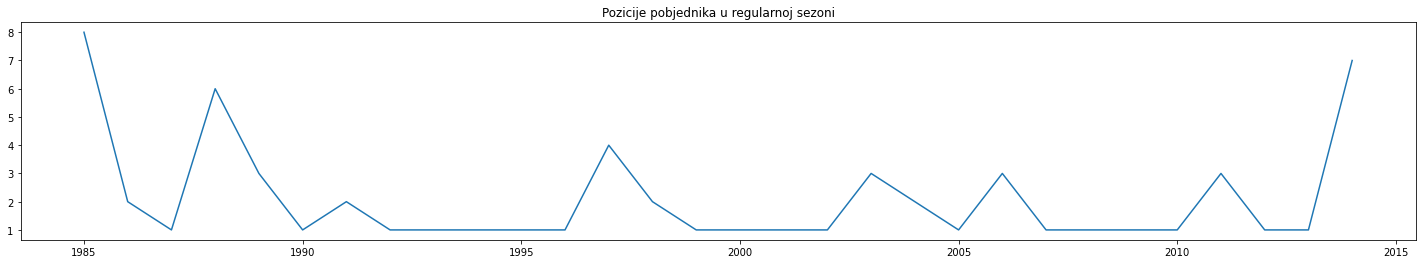

<BarContainer object of 1 artists>

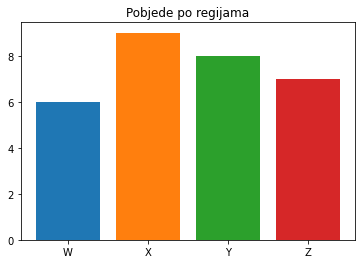

In [ ]:
finals=tourney_results.loc[tourney_results['daynum']==154]
winners=finals[['season', 'wteam']]
winners=winners.set_index('season')

winners_seeds=[]

sezone=list(seasons['season'])
w=0
x=0
y=0
z=0
for i in range(len(winners)):
  winner_seed=list(tourney_seeds.loc[tourney_seeds['team']==list(winners['wteam'])[i]].loc[tourney_seeds['season']==sezone[i]]['seed'])
  winners_seeds.append(int(winner_seed[0][1:]))
 
  if winner_seed[0][0]=='W': 
    w+=1
  elif winner_seed[0][0]=='Z': 
    z+=1
  elif winner_seed[0][0]=='Y': 
    y+=1
  elif winner_seed[0][0]=='X': 
    x+=1          

plt.figure(figsize=(25, 4))
plt.plot(sezone[:-1], winners_seeds)
plt.title("Pozicije pobjednika u regularnoj sezoni")
plt.show()

plt.title("Pobjede po regijama")
plt.bar('W', w)
plt.bar('X', x)
plt.bar('Y', y)
plt.bar('Z', z)


Koristeći gore dobiveni skup winners, prikazat ćemo koliko je puta koji tim osvojio natjecanje, ako tim nije na grafu to znači da nije nikada osvojio natjecanje.

Text(0.5, 1.0, 'Broj pobjeda pojedinog tima')

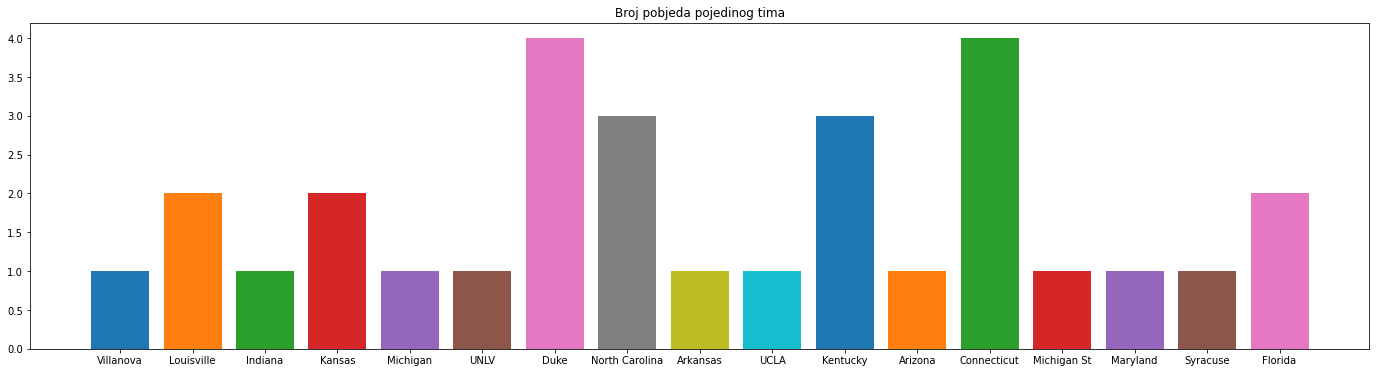

In [ ]:
winners_count={}
for i in winners['wteam']:
  if i in winners_count:
    winners_count[i]+=1
  else:
    winners_count[i]=1

plt.figure(figsize=(24, 6))
for winner in winners_count:
  plt.bar(teams.loc[teams['team_id']==winner]['team_name'],winners_count[winner])

plt.title("Broj pobjeda pojedinog tima")  

Graf koji će nacrtati kod ispod pokazat će scatter plot boja odigranih turnira za svaki tim i onda kasnije broja odigranih turnira pobjednika.

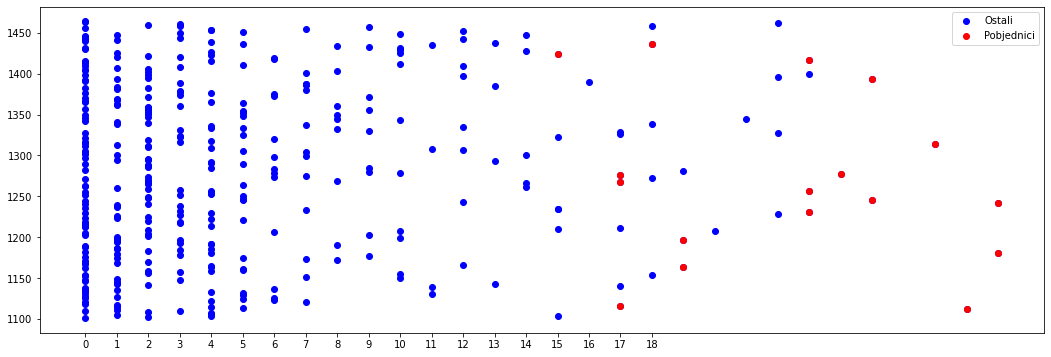

In [ ]:
timovi=list(teams['team_id'])
sezone= list(seasons['season'])

sudjelovanja_timova=dict.fromkeys(timovi, 0)

for tim in timovi:
  for sezona in sezone:
    broj_pobjeda=len(tourney_results.loc[tourney_results['season']==sezona].loc[tourney_results['wteam']==tim])
    broj_poraza=len(tourney_results.loc[tourney_results['season']==sezona].loc[tourney_results['lteam']==tim])
    
    if (broj_pobjeda !=0) or (broj_poraza!=0):
      sudjelovanja_timova[tim]+=1

plt.figure(figsize=(18, 6))
plt.scatter(sudjelovanja_timova.values(), sudjelovanja_timova.keys(), c='blue', label='Ostali', data=range(1, 19, 1))

sudjelovanja_pobjednika={}

for winner in winners['wteam']:
  sudjelovanja_pobjednika[winner]=sudjelovanja_timova[winner]

plt.scatter(sudjelovanja_pobjednika.values(), sudjelovanja_pobjednika.keys(), c='red', label='Pobjednici', data=range(1, 19, 1))
plt.legend(loc='best')
plt.xticks(range(0, 19, 1))
plt.show()

Ovime je vizualizacija podataka gotova, nacrtani grafovi ukazuju nam da turnire osvajaju samo neki timovi,a njihov rezultat najčešće ovisi o poziciji u regularnoj sezoni i o iskustvu igranja prijašnjih turnira, jer škole koje su uspijevale prije ostaju na dobrom glasu pa onda uspijevaju i kasnije jer privlače bolje igraće.

#3. Reproduciranje rezultata
Cilj drugug djela projekta je reproducirati rezultate iz odabranog članka.


#3.1 Učitavanje novodobivenih podataka

In [ ]:
regular_seasons_detailed = pd.read_csv("regular_season_detailed_results.csv")
regular_seasons_detailed.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [ ]:
tourney_detailed = pd.read_csv("tourney_detailed_results.csv")
tourney_detailed.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


Vidi se da novi podatci sadrže puno više varijabli nego prijašnji podatci. Testiranjem su istraživači u članku otkrili koje su najvažnije varijable tj. izračunali su koje popularne košarkaške statistike najviše pridonose pobjedi. 

To su:

**RPI rank difference**-Rating Percentage Index, govori o poziciji pojedinog tima na rangiranoj tablici RPI-a. RPI je popularna statistika koja se koristi za određivanje snage tima, a računa se formulom:

RPI=0.25wp+ 0.5owp+ 0.25oowp,

gdje je wp-win percentage, owp- opponents win percentage i oowp- opponent’s opponent win percentage.

**BPI difference**-College Basketball Power Index, govori o snazi pojedinog tima, računa se razlika u prosječnom broju zabijenih i prosječnom broju primljenih bodova u 70 posjeda(u ovom dokumentu BPI je računat bez skaliranja na 70 posjeda jer je to nemoguće s obzirom na dobivene podatke

**Steals difference**-razlika u broju ukradenih lopti

**Points difference**-razlika u broju zabijenih koševa 

**Blocks difference**-razlika u broju blokova

**Field goals percentage difference**-razlika u efikasnosti šuta

Kod ispod će maknuti podatke za sve sezone osim 2011, 2012, 2013, 2014 regularne sezona i 2011, 2012, 2013 rezultati turnira jer su te podatke koristili u članku.

In [ ]:
regular_seasons_detailed.drop(regular_seasons_detailed[regular_seasons_detailed['season'] < 2011].index, inplace = True)
tourney_detailed.drop(tourney_detailed[tourney_detailed['season'] < 2011].index, inplace = True)
tourney_detailed.drop(tourney_detailed[tourney_detailed['season'] > 2013].index, inplace = True)


#3.2 Računanje potrebnih podataka i stvaranje novog dataseta

Kod ispod stvara novi skup podataka i u njega ubacuje sve značajke koje je odmah moguće izračunati.

In [ ]:
#stvaranje dataseta sa podatcima koji ce mi kasnije trebati
podatci_za_predvidanje=pd.DataFrame({'season': pd.Series(dtype='int'),
                   'team': pd.Series(dtype='int'),
                   'wp': pd.Series(dtype='float'),
                   'BPI': pd.Series(dtype='float'),
                   'ts': pd.Series(dtype='float'),
                   'tb': pd.Series(dtype='float'),
                   'fgp': pd.Series(dtype='float'),
                   'RPI_rank': pd.Series(dtype='int'),
                   'tp': pd.Series(dtype='float')})

godine=regular_seasons_detailed.season.unique()


for godina in godine:
  timovi=[]
  pom_df=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina]
  timovi.append(set(pom_df.wteam.unique()))
  timovi.append(set(pom_df.lteam.unique()))
  timovi=set.union(timovi[0], timovi[1])
  

  for tim in timovi:

    wins=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina].loc[regular_seasons_detailed['wteam']==tim]
    loses=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina].loc[regular_seasons_detailed['lteam']==tim]
    
    if wins.empty:
      points=loses.lscore.sum()
      steals=loses.lstl.sum()
      efikasnost=(loses.lfgm.sum()/loses.lfga.sum())
      blocks=loses.lblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      
      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(loses.lscore.mean())
      opp_ppg=(loses.wscore.mean())

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':0.0, 'BPI':BPI, 'ts':steals, 'tb':blocks,'fgp':efikasnost*100, 'tp':points, 'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)

    elif loses.empty:

      points=wins.wscore.sum()
      steals=wins.wstl.sum()
      efikasnost=(wins.wfgm.sum()/wins.wfga.sum())
      blocks=wins.wblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      
      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(wins.wscore.mean())
      opp_ppg=(wins.lscore.mean())

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':1.0, 'BPI':BPI, 'ts':steals, 'tb':blocks,'fgp':efikasnost*100, 'tp':points, 'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)  

    else: 

      num_wins=len(wins.index)
      num_loses=len(loses.index)

      points=wins.wscore.sum()+loses.lscore.sum()
      steals=wins.wstl.sum()+loses.lstl.sum()
      efikasnost=(wins.wfgm.sum()+loses.lfgm.sum())/(wins.wfgm.sum()+loses.lfga.sum())
      blocks=wins.wblk.sum()+loses.lblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      
      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(wins.wscore.mean()+loses.lscore.mean())/2
      opp_ppg=(wins.lscore.mean()+loses.wscore.mean())/2

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':(num_wins/(num_wins+num_loses)), 'BPI':BPI, 'ts':steals, 'tb':blocks,'fgp':efikasnost*100, 'tp':points, 'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)



podatci_za_predvidanje.head()

,season,team,wp,BPI,ts,tb,fgp,RPI_rank,tp
0,2011.0,1102.0,0.500000,-0.535714,174.0,71.0,62.425447,0.0,1799.0
1,2011.0,1103.0,0.647059,0.147727,219.0,116.0,65.878645,0.0,2379.0
2,2011.0,1104.0,0.656250,3.305195,296.0,167.0,70.132159,0.0,2133.0
3,2011.0,1105.0,0.400000,-1.033333,214.0,132.0,51.630941,0.0,1570.0
4,2011.0,1106.0,0.468750,-1.980392,234.0,146.0,53.605769,0.0,1970.0


RPI se mora računati u drugom prolasku zbog efikasnosti i potrebe za podatkom postotka pobjede koji je u prethodnoj ćeliji izračunat.

**NAPOMENA**: RPI traži da iteriramo kroz protivnikove protivnike što znači da je složenost donje ćelije O(n^3) stoga računanje traje i do 15 minuta, zato se moli čitača da bude strpljiv. Hvala.

In [ ]:
#racunanje RPI

godine=podatci_za_predvidanje.season.unique()

for godina in godine:
  timovi=podatci_za_predvidanje.loc[podatci_za_predvidanje['season'] == godina]
  timovi=list(timovi.team.unique())
  
  RPI_ranking={}

  for tim in timovi:
    wp=list(podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==tim]['wp'])[0]
    
    protivnici=[]
    pom_wins=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['wteam']==tim]
    pom_loses=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['lteam']==tim]
    protivnici.append(set(pom_wins.lteam.unique()))
    protivnici.append(set(pom_loses.wteam.unique()))
    protivnici=set.union(protivnici[0], protivnici[1])
    
    owp=0
    oowp=0
    
    for protivnik in protivnici:
      owp_tmp=podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==protivnik]['wp']
      owp+=list(owp_tmp)[0]

      protivnikovi_protivnici=[]
      pom_wins=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['wteam']==protivnik]
      pom_loses=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['lteam']==protivnik]
      protivnikovi_protivnici.append(set(pom_wins.lteam.unique()))
      protivnikovi_protivnici.append(set(pom_loses.wteam.unique()))
      protivnikovi_protivnici=set.union(protivnikovi_protivnici[0], protivnikovi_protivnici[1])

      owp_pom=0
      for protivnikov_protivnik in protivnikovi_protivnici:
        owp_pom_tmp=podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==protivnikov_protivnik]['wp']
        owp_pom+=list(owp_pom_tmp)[0]

      oowp+=owp_pom/len(protivnikovi_protivnici)

    owp=owp/len(protivnici)
    oowp=oowp/len(protivnici)  
    RPI=0.25*wp+0.5*owp+0.25*oowp
    RPI_ranking[tim]=RPI
    
  RPI_sorted=dict(sorted(RPI_ranking.items(), key=lambda item: item[1], reverse=True))
  for tim in timovi:
    index = list(RPI_sorted).index(tim)
    podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim), 'RPI_rank']=index+1

    

#3.3 Dopunjavanje skupa utakmica novo dobivanim varijablama

Prvo treba spojiti skupove podataka utakmica regularnih sezona i utakmica odigranih na turniru.




In [ ]:
dataset = regular_seasons_detailed.append(tourney_detailed, ignore_index=True)

Kod ispod umetnuti će dodatno izračunate varijable.

In [ ]:
godine=dataset.season.unique()

for godina in godine:
  timovi=[]
  pom_df=dataset.loc[dataset['season'] == godina]
  timovi.append(set(pom_df.wteam.unique()))
  timovi.append(set(pom_df.lteam.unique()))
  timovi=set.union(timovi[0], timovi[1])

  for tim in timovi:
    ts=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['ts']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wts']=list(ts)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lts']=list(ts)[0]
    
    tp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['tp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wtp']=list(tp)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'ltp']=list(tp)[0]

    tb=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['tb']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wtb']=list(tb)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'ltb']=list(tb)[0]

    fgp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['fgp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wfgp']=list(fgp)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lfgp']=list(fgp)[0]

    RPI_rank=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['RPI_rank']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wRPI_rank']=list(RPI_rank)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lRPI_rank']=list(RPI_rank)[0]

    BPI=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['BPI']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wBPI']=list(BPI)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lBPI']=list(BPI)[0]
    
    wp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['wp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wp']=list(wp)[0]


dataset.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,ltp,wtb,ltb,wfgp,lfgp,wRPI_rank,lRPI_rank,wBPI,lBPI,wp
0,2011,7,1228,79,1414,65,H,0,29,58,...,2312.0,148.0,53.0,65.552100,53.031359,46.0,308.0,4.036437,0.714912,0.593750
1,2011,7,1268,105,1370,76,H,0,35,62,...,2138.0,150.0,60.0,66.193182,49.835634,91.0,295.0,6.738722,-3.590909,0.575758
2,2011,7,1338,83,1348,75,H,0,29,64,...,2186.0,110.0,123.0,85.905350,62.330407,6.0,94.0,6.292593,-0.578947,0.843750
3,2011,7,1400,83,1298,52,H,0,30,59,...,2039.0,167.0,72.0,77.452668,47.754811,10.0,307.0,6.296296,-1.075000,0.794118
4,2011,9,1228,84,1405,45,H,0,37,64,...,1773.0,148.0,43.0,65.552100,42.948264,46.0,330.0,4.036437,-3.511905,0.593750


Umetanje varijabli koje predstavljaju razlike u iznosima izračunatih značajki po kojima će s izvesti regresija.

In [ ]:
#umetanje diff varijabli po kojima ce ići regresija

for index, row in dataset.iterrows():
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'BPI_diff']=row['wBPI']-row['lBPI']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'ts_diff']=row['wts']-row['lts']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'RPI_rank_diff']=row['wRPI_rank']-row['lRPI_rank']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'tb_diff']=row['wtb']-row['ltb']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'tp_diff']=row['wtp']-row['ltp']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'fgp_diff']=row['wfgp']-row['lfgp']

dataset  

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lRPI_rank,wBPI,lBPI,wp,BPI_diff,ts_diff,RPI_rank_diff,tb_diff,tp_diff,fgp_diff
0,2011,7,1228,79,1414,65,H,0,29,58,...,308.0,4.036437,0.714912,0.593750,3.321525,-24.0,-262.0,95.0,-31.0,12.520741
1,2011,7,1268,105,1370,76,H,0,35,62,...,295.0,6.738722,-3.590909,0.575758,10.329631,-37.0,-204.0,90.0,398.0,16.357547
2,2011,7,1338,83,1348,75,H,0,29,64,...,94.0,6.292593,-0.578947,0.843750,6.871540,-56.0,-88.0,-13.0,184.0,23.574943
3,2011,7,1400,83,1298,52,H,0,30,59,...,307.0,6.296296,-1.075000,0.794118,7.371296,-71.0,-297.0,95.0,508.0,29.697857
4,2011,9,1228,84,1405,45,H,0,37,64,...,330.0,4.036437,-3.511905,0.593750,7.548342,7.0,-284.0,105.0,508.0,22.603836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21377,2013,146,1257,85,1181,63,N,0,29,55,...,1.0,7.400000,3.474074,0.852941,3.925926,156.0,2.0,23.0,-4.0,0.684875
21378,2013,146,1276,79,1196,59,N,0,30,65,...,8.0,4.594286,9.609890,0.781250,-5.015604,-37.0,12.0,-18.0,16.0,-0.607480
21379,2013,152,1257,72,1455,68,N,0,22,49,...,34.0,7.400000,3.504808,0.852941,3.895192,111.0,-31.0,-8.0,140.0,6.273680
21380,2013,152,1276,61,1393,56,N,0,21,53,...,17.0,4.594286,4.525641,0.781250,0.068645,-118.0,3.0,-126.0,-117.0,4.213036


#3.4 Izrada modela linearne regresije ćija kombinacija će biti iskorištena za predviđanje rezultata.

Ovdje će sad za svaku of varijabli razlike biti izdvojen skup ulaznih varijabli X i pripremljen skup izlaznih varijabli y (isti za sve regresije) te će se prikazati i graf funkcija svake regresije.

Sve regresije bit će stupanja 2 kao i u članku.

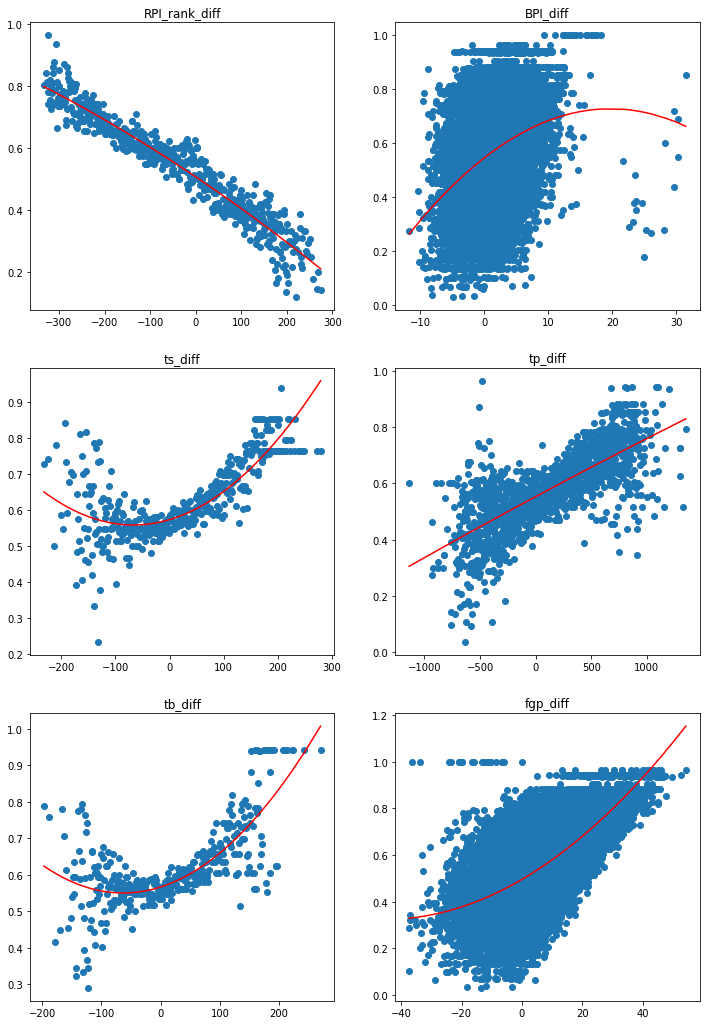

In [ ]:
i=1
V_diff=['RPI_rank_diff', 'BPI_diff', 'ts_diff', 'tp_diff', 'tb_diff', 'fgp_diff']
regresion_models=[]
plt.figure(figsize=(12, 18))
for v in V_diff:
  D_v=dataset[[v, 'wp']].groupby(v).median().reset_index()
  X=np.asarray(D_v[v])
  y=np.asarray(D_v['wp'])
  fi= PolynomialFeatures(degree=2).fit_transform(X.reshape(-1,1))

  regr=LinearRegression().fit(fi, y)
  regresion_models.append(regr)

  pred=regr.predict(fi)
  plt.subplot(3,2,i)
  plt.scatter(X, y)
  plt.plot(X, pred, 'r')
  plt.title(v)
  i+=1

Kod ispod prikazuje metode opisane u članku koje će biti korištene za jednostavno predviđanje rezultata.

In [ ]:
V=['RPI_rank', 'BPI', 'ts', 'tp', 'tb', 'fgp']

def predOfWinning(teamA, teamB):
  P=0
  for v, regr in zip(V, regresion_models):
      A_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==teamA)][v])[0]
      B_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==teamB)][v])[0]
      p_v=callProbWin(regr, A_v, B_v)
      P+=p_v
  P=P/len(V)

  return P  


def callProbWin(regr, A_v, B_v):
  x=np.asarray(abs(A_v- B_v))
  fi= PolynomialFeatures(degree=2).fit_transform(x.reshape(-1,1))
  y=regr.predict(fi)

  if (A_v - B_v) > 0:
    return y
  return 1 - y


#3.5 Predviđanje rezulatata

Prvo treba strukturu turnira i ljestvice iz regularne sezone učitati i pripremiti za korištenje.

In [ ]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")

#zadrzavamo samo podatke za 2014
tourney_seeds=tourney_seeds.drop(tourney_seeds[tourney_seeds['season'] != 2014].index)
tourney_slots=tourney_slots.drop(tourney_slots[tourney_slots['season'] != 2014].index)

#rotiramo tako da play in utakmice budu prije po redosljedu
tourney_slots = tourney_slots.reindex(np.roll(tourney_slots.index, shift=4))

Sad ćemo predviđati rezultate utakmica i to ispisivati, ovo je predviđanje cijelog turnira. 

In [ ]:
for index, row in tourney_slots.iterrows():
  teamA=list(tourney_seeds.loc[tourney_seeds['seed']==row['strongseed']]['team'])[0]
  teamB=list(tourney_seeds.loc[tourney_seeds['seed']==row['weakseed']]['team'])[0]
  P=predOfWinning(teamA, teamB)[0]

  imeA=list(teams.loc[teams['team_id']==teamA]['team_name'])[0]
  imeB=list(teams.loc[teams['team_id']==teamB]['team_name'])[0]

  if P>0.5:
    print("U rundi: "+str(row['slot'])+" u utakmici između: " +str(row['strongseed'])+" "+ imeA+ " i " +str(row['weakseed'])+" "+ imeB+" sa vjerojatnoscu "+ str(P)+" pobjedio je "+imeA)
    novi_red = {'season':2014, 'seed':row['slot'], "team":teamA}
    tourney_seeds=tourney_seeds.append(novi_red, ignore_index=True)
  else:
    print("U rundi: "+str(row['slot'])+" u utakmici između: " +str(row['strongseed'])+" "+ imeA+ " i " +str(row['weakseed'])+" "+ imeB+" sa vjerojatnoscu "+ str(1-P)+" pobjedio je "+imeB)
    novi_red = {'season':2014, 'seed':row['slot'], "team":teamB}
    tourney_seeds=tourney_seeds.append(novi_red, ignore_index=True)


U rundi: X16 u utakmici između: X16a Albany NY i X16b Mt St Mary's sa vjerojatnoscu 0.5279519372251829 pobjedio je Mt St Mary's
U rundi: Y11 u utakmici između: Y11a Iowa i Y11b Tennessee sa vjerojatnoscu 0.5685835637293777 pobjedio je Iowa
U rundi: Y12 u utakmici između: Y12a NC State i Y12b Xavier sa vjerojatnoscu 0.5030683410399777 pobjedio je Xavier
U rundi: Y16 u utakmici između: Y16a Cal Poly SLO i Y16b TX Southern sa vjerojatnoscu 0.5512180625999892 pobjedio je TX Southern
U rundi: R1W1 u utakmici između: W01 Virginia i W16 Coastal Car sa vjerojatnoscu 0.5837673873133084 pobjedio je Virginia
U rundi: R1W2 u utakmici između: W02 Villanova i W15 WI Milwaukee sa vjerojatnoscu 0.6248411344442603 pobjedio je Villanova
U rundi: R1W3 u utakmici između: W03 Iowa St i W14 NC Central sa vjerojatnoscu 0.5096551016324802 pobjedio je NC Central
U rundi: R1W4 u utakmici između: W04 Michigan St i W13 Delaware sa vjerojatnoscu 0.5492132664370123 pobjedio je Michigan St
U rundi: R1W5 u utakmici i

Ovdje ispod je prikazano predviđanje za sve zapravo odigrane utakmice u turiru te će onda biti ispisana točnost pogođenih utakmica i logoritamska pogreška.

In [ ]:
#popis odigranih utakmica
tourney_2014 = pd.read_csv("tourney_detailed_results.csv")
tourney_2014.drop(tourney_2014[tourney_2014['season'] < 2014].index, inplace = True)

tourney_2014=tourney_2014[['season', 'wteam', 'lteam']]

In [ ]:
#odrađivanje predviđanja
for index, row in tourney_2014.iterrows():
  P=predOfWinning(row['wteam'], row['lteam'])
  tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'probWin']=P
  if P>=0.5:
    tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'correct']=1
  else:  
    tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'correct']=0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
#broj tocno predviđenih utakmica
tocno=tourney_2014.correct.sum()
ukupno=tourney_2014.correct.count()

print("Od odigranih "+ str(ukupno)+ " utakmica točno je predviđeno "+ str(tocno)+" utakmica, što daje preciznost od "+ str((tocno/ukupno)*100)+ "%.")

Od odigranih 67 utakmica točno je predviđeno 38.0 utakmica, što daje preciznost od 56.71641791044776%.


LogLoss formula je:

logLoss=-1/n * sum(y_i\*log(pred_i)+(1-y_i)\*log(1-pred_i),

gdje y_i-1 ili 0 ovisno jel tim q pobijedio i pred_i predviđena vjerojatnoszt pobjede prvog tima.

In [ ]:
#pošto je u tablici prvi tim uvijek pobjednicki tim ne treba pisat gornu formulu jer y_i uvijek 1
preds=list(tourney_2014['probWin'])
sum=0
for pred in preds:
  sum+=math.log(pred)

logLoss=-sum/len(preds)

print("Iznos logističke pogreške je "+str(logLoss)+".")

Iznos logističke pogreške je 0.6650908771702518.


#4. Unaprijeđivanje rezultata
Cilj ovog poglavlja je unaprijediti rezultate članka primjenom drugačijih tehnika strojnog učenja.

#4.1. Logistička regresija
Sada ću pripremiti podatke i izvesti predviđanje logističkom regresijom.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sum']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


##4.1.1 Učitavanje podataka

Koristiti ćemo podatke iz 2000-tih godina nadalje.

In [34]:
regular_seasons_detailed = pd.read_csv("regular_season_detailed_results.csv")
tourney_detailed = pd.read_csv("tourney_detailed_results.csv")

regular_seasons_detailed.drop(regular_seasons_detailed[regular_seasons_detailed['season'] < 2000].index, inplace = True)
tourney_detailed.drop(tourney_detailed[tourney_detailed['season'] < 2000].index, inplace = True)
tourney_detailed.drop(tourney_detailed[tourney_detailed['season'] > 2013].index, inplace = True)

Promjeniti ćemo ime wast i last u wasist i lasist zbog errora koji nastaju zbog kratice last.

In [35]:
regular_seasons_detailed.rename(columns = {'last':'lasist', 'wast':'wasist'}, inplace = True)
regular_seasons_detailed.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,lasist,lto,lstl,lblk,lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


##4.1.2 Priprema podataka
Predviđanje ćemo raditi nad već poznatim podatcima koji su korišteni u članku, ali ćemo dodati i novi Assist/Turnover ratio, te ćemo Field Goal Percentage promjeniti u Effective field goal percentage.

Ovo su sve korištene varijable i njihova značenja:

**RPI rank difference**-Rating Percentage Index, govori o poziciji pojedinog tima na rangiranoj tablici RPI-a. RPI je popularna statistika koja se koristi za određivanje snage tima, a računa se formulom:

RPI=0.25wp+ 0.5owp+ 0.25oowp,

gdje je wp-win percentage, owp- opponents win percentage i oowp- opponent’s opponent win percentage.

**BPI difference**-College Basketball Power Index, govori o snazi pojedinog tima, računa se razlika u prosječnom broju zabijenih i prosječnom broju primljenih bodova u 70 posjeda(u ovom dokumentu BPI je računat bez skaliranja na 70 posjeda jer je to nemoguće s obzirom na dobivene podatke

**Steals difference**-razlika u broju ukradenih lopti

**Points difference**-razlika u broju zabijenih koševa 

**Blocks difference**-razlika u broju blokova

**Effective Field goals percentage difference**-razlika u efikasnosti šuta

**Assist/Turnover ratio difference**- razlika u omjeru asistencija sa izgubljenim loptama.


In [74]:
#stvaranje dataseta sa podatcima koji ce mi kasnije trebati
podatci_za_predvidanje=pd.DataFrame({'season': pd.Series(dtype='int'),
                   'team': pd.Series(dtype='int'),
                   'wp': pd.Series(dtype='float'),
                   'BPI': pd.Series(dtype='float'),
                   'ts': pd.Series(dtype='float'),
                   'tb': pd.Series(dtype='float'),
                   'efgp': pd.Series(dtype='float'),
                   'atr': pd.Series(dtype='float'),
                   'RPI_rank': pd.Series(dtype='int'),
                   'tp': pd.Series(dtype='float')})

godine=regular_seasons_detailed.season.unique()


for godina in godine:
  timovi=[]
  pom_df=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina]
  timovi.append(set(pom_df.wteam.unique()))
  timovi.append(set(pom_df.lteam.unique()))
  timovi=set.union(timovi[0], timovi[1])
  

  for tim in timovi:

    wins=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina].loc[regular_seasons_detailed['wteam']==tim]
    loses=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina].loc[regular_seasons_detailed['lteam']==tim]
    
    if wins.empty:
      points=loses.lscore.sum()
      steals=loses.lstl.sum()
      efikasnost=(loses.lfgm.sum()+0.5*loses.lfgm3.sum())/loses.lfga.sum()
      blocks=loses.lblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      atr=loses.lasist.sum()/loses.lto.sum()

      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(loses.lscore.mean())
      opp_ppg=(loses.wscore.mean())

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':0.0, 'BPI':BPI, 'ts':steals, 'tb':blocks,'efgp':efikasnost*100, 'tp':points, 'atr':atr, 'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)

    elif loses.empty:

      points=wins.wscore.sum()
      steals=wins.wstl.sum()
      efikasnost=(wins.wfgm.sum()+0.5*wins.wfgm3.sum())/wins.wfga.sum()
      blocks=wins.wblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      atr=wins.wasist.sum()/wins.wto.sum()

      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(wins.wscore.mean())
      opp_ppg=(wins.lscore.mean())

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':1.0, 'BPI':BPI, 'ts':steals, 'tb':blocks,'efgp':efikasnost*100, 'tp':points, 'atr':atr,'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)  

    else: 

      num_wins=len(wins.index)
      num_loses=len(loses.index)

      points=wins.wscore.sum()+loses.lscore.sum()
      steals=wins.wstl.sum()+loses.lstl.sum()
      efikasnost=(wins.wfgm.sum()+loses.lfgm.sum()+0.5*(wins.wfgm3.sum()+loses.lfgm3.sum()))/(wins.wfgm.sum()+loses.lfga.sum())
      blocks=wins.wblk.sum()+loses.lblk.sum()
      sve_tekme_u_sezoni=regular_seasons_detailed.loc[regular_seasons_detailed['season']==godina]
      atr=(wins.wasist.sum()+loses.lasist.sum())/(wins.wto.sum()+loses.lto.sum())

      avg_ppg=(sve_tekme_u_sezoni.wscore.mean()+sve_tekme_u_sezoni.lscore.mean())/2
      team_ppg=(wins.wscore.mean()+loses.lscore.mean())/2
      opp_ppg=(wins.lscore.mean()+loses.wscore.mean())/2

      #BPI=BPI_off+BPI_deff
      #BPI_off=team_ppg-avg_ppg
      #BPI_deff=avg_ppg-opp_ppg
      #BPI=team_ppg-opp_ppg
      BPI=team_ppg-opp_ppg

      novi_red = {'season':godina, 'team':tim, 'wp':(num_wins/(num_wins+num_loses)), 'BPI':BPI, 'ts':steals, 'tb':blocks,'efgp':efikasnost*100, 'tp':points, 'atr':atr, 'RPI_rank':0}
      podatci_za_predvidanje=podatci_za_predvidanje.append(novi_red, ignore_index=True)



podatci_za_predvidanje.head()

,season,team,wp,BPI,ts,tb,efgp,atr,RPI_rank,tp
0,2003.0,1102.0,0.428571,2.166667,167.0,50.0,71.325967,1.137500,0.0,1603.0
1,2003.0,1103.0,0.481481,0.942308,196.0,63.0,68.463497,1.205279,0.0,2127.0
2,2003.0,1104.0,0.607143,1.860963,185.0,106.0,72.709924,0.911290,0.0,1940.0
3,2003.0,1105.0,0.269231,0.763158,242.0,54.0,54.339763,0.779381,0.0,1866.0
4,2003.0,1106.0,0.464286,0.558974,234.0,88.0,63.376068,0.685535,0.0,1781.0


RPI se mora računati u drugom prolasku zbog efikasnosti i potrebe za podatkom postotka pobjede koji je u prethodnoj ćeliji izračunat.

**NAPOMENA**: RPI traži da iteriramo kroz protivnikove protivnike što znači da je složenost donje ćelije O(n^3) stoga računanje traje i do 15 minuta, zato se moli čitača da bude strpljiv. Hvala.

In [75]:
#racunanje RPI
#36m
godine=podatci_za_predvidanje.season.unique()

for godina in godine:
  timovi=podatci_za_predvidanje.loc[podatci_za_predvidanje['season'] == godina]
  timovi=list(timovi.team.unique())
  
  RPI_ranking={}

  for tim in timovi:
    wp=list(podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==tim]['wp'])[0]
    
    protivnici=[]
    pom_wins=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['wteam']==tim]
    pom_loses=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['lteam']==tim]
    protivnici.append(set(pom_wins.lteam.unique()))
    protivnici.append(set(pom_loses.wteam.unique()))
    protivnici=set.union(protivnici[0], protivnici[1])
    
    owp=0
    oowp=0
    
    for protivnik in protivnici:
      owp_tmp=podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==protivnik]['wp']
      owp+=list(owp_tmp)[0]

      protivnikovi_protivnici=[]
      pom_wins=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['wteam']==protivnik]
      pom_loses=regular_seasons_detailed.loc[regular_seasons_detailed['season'] == godina].loc[regular_seasons_detailed['lteam']==protivnik]
      protivnikovi_protivnici.append(set(pom_wins.lteam.unique()))
      protivnikovi_protivnici.append(set(pom_loses.wteam.unique()))
      protivnikovi_protivnici=set.union(protivnikovi_protivnici[0], protivnikovi_protivnici[1])

      owp_pom=0
      for protivnikov_protivnik in protivnikovi_protivnici:
        owp_pom_tmp=podatci_za_predvidanje.loc[podatci_za_predvidanje['season']==godina].loc[podatci_za_predvidanje['team']==protivnikov_protivnik]['wp']
        owp_pom+=list(owp_pom_tmp)[0]

      oowp+=owp_pom/len(protivnikovi_protivnici)

    owp=owp/len(protivnici)
    oowp=oowp/len(protivnici)  
    RPI=0.25*wp+0.5*owp+0.25*oowp
    RPI_ranking[tim]=RPI
    
  RPI_sorted=dict(sorted(RPI_ranking.items(), key=lambda item: item[1], reverse=True))
  for tim in timovi:
    index = list(RPI_sorted).index(tim)
    podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim), 'RPI_rank']=index+1


Zbog količine vremena potrebne za stavranje dataseta *podatci_za_pretraživanje*, samo ću ga učitati nakon što sam ga spremio prije.

In [81]:
podatci_za_predvidanje= pd.read_csv("podatci_za_predvidanje.csv")

##4.1.3 Dopunjavanje dataseta utakmica novim podatcima
U ovom poglavlju skup podataka utakmica bit će nadopunjen novo izračunatim varijablama, te će također biti nadodane varijable razlike.

In [83]:
#dodavanje izračunatih varijabli

dataset = regular_seasons_detailed.append(tourney_detailed, ignore_index=True)

godine=dataset.season.unique()

for godina in godine:
  timovi=[]
  pom_df=dataset.loc[dataset['season'] == godina]
  timovi.append(set(pom_df.wteam.unique()))
  timovi.append(set(pom_df.lteam.unique()))
  timovi=set.union(timovi[0], timovi[1])

  for tim in timovi:
    ts=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['ts']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wts']=list(ts)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lts']=list(ts)[0]
    
    tp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['tp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wtp']=list(tp)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'ltp']=list(tp)[0]

    tb=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['tb']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wtb']=list(tb)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'ltb']=list(tb)[0]

    fgp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['efgp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wefgp']=list(fgp)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lefgp']=list(fgp)[0]

    atr=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['atr']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'watr']=list(atr)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'latr']=list(atr)[0]

    RPI_rank=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['RPI_rank']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wRPI_rank']=list(RPI_rank)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lRPI_rank']=list(RPI_rank)[0]

    BPI=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['BPI']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wBPI']=list(BPI)[0]
    dataset.loc[(dataset["season"] == godina) & (dataset['lteam']==tim), 'lBPI']=list(BPI)[0]
    
    wp=podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == godina) & (podatci_za_predvidanje['team']==tim)]['wp']
    dataset.loc[(dataset["season"] == godina) & (dataset['wteam']==tim), 'wp']=list(wp)[0]


dataset.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,ltb,wefgp,lefgp,watr,latr,wRPI_rank,lRPI_rank,wBPI,lBPI,wp
0,2003,10,1104,68,1328,62,N,0,27,58,...,113.0,72.709924,89.876033,0.911290,1.200565,30.0,4.0,1.860963,4.187500,0.607143
1,2003,10,1272,70,1393,63,N,0,26,62,...,211.0,87.576065,87.832700,1.205000,1.098734,22.0,14.0,3.014493,2.208333,0.793103
2,2003,11,1266,73,1437,61,N,0,24,58,...,102.0,89.490446,65.912637,1.202632,0.814969,7.0,61.0,3.313043,2.100000,0.821429
3,2003,11,1296,56,1457,50,N,0,18,38,...,151.0,71.518456,73.654391,0.745731,0.860976,110.0,178.0,-1.304622,-0.083333,0.548387
4,2003,11,1400,77,1208,71,N,0,30,61,...,118.0,85.152409,81.796578,1.079787,1.551282,3.0,6.0,3.992424,2.273026,0.785714


In [84]:
#umetanje diff varijabli po kojima ce ići predviđanje

for index, row in dataset.iterrows():
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'BPI_diff']=row['wBPI']-row['lBPI']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'ts_diff']=row['wts']-row['lts']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'RPI_rank_diff']=row['wRPI_rank']-row['lRPI_rank']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'tb_diff']=row['wtb']-row['ltb']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'tp_diff']=row['wtp']-row['ltp']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'efgp_diff']=row['wefgp']-row['lefgp']
  dataset.loc[(dataset["season"] == row['season']) & (dataset['wteam']==row['wteam']) & (dataset['lteam']==row['lteam']), 'atr_diff']=row['watr']-row['latr']

dataset  

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,wBPI,lBPI,wp,BPI_diff,ts_diff,RPI_rank_diff,tb_diff,tp_diff,efgp_diff,atr_diff
0,2003,10,1104,68,1328,62,N,0,27,58,...,1.860963,4.187500,0.607143,-2.326537,-23.0,26.0,-7.0,-195.0,-17.166109,-0.289275
1,2003,10,1272,70,1393,63,N,0,26,62,...,3.014493,2.208333,0.793103,0.806159,-27.0,8.0,-64.0,-162.0,-0.256635,0.106266
2,2003,11,1266,73,1437,61,N,0,24,58,...,3.313043,2.100000,0.821429,1.213043,-57.0,-54.0,0.0,29.0,23.577809,0.387663
3,2003,11,1296,56,1457,50,N,0,18,38,...,-1.304622,-0.083333,0.548387,-1.221289,23.0,-68.0,-39.0,214.0,-2.135935,-0.115245
4,2003,11,1400,77,1208,71,N,0,30,61,...,3.992424,2.273026,0.785714,1.719398,-27.0,-3.0,-10.0,70.0,3.355831,-0.471495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,2013,146,1257,85,1181,63,N,0,29,55,...,7.400000,3.474074,0.852941,3.925926,156.0,2.0,23.0,-4.0,-1.623229,-0.186968
61227,2013,146,1276,79,1196,59,N,0,30,65,...,4.594286,9.609890,0.781250,-5.015604,-37.0,12.0,-18.0,16.0,-2.848441,0.199778
61228,2013,152,1257,72,1455,68,N,0,22,49,...,7.400000,3.504808,0.852941,3.895192,111.0,-31.0,-8.0,140.0,5.349284,0.105134
61229,2013,152,1276,61,1393,56,N,0,21,53,...,4.594286,4.525641,0.781250,0.068645,-118.0,3.0,-126.0,-117.0,5.874602,0.380620


Zbog količine vremena potrebne za stavranje dataseta *dataset*, samo ću ga učitati nakon što sam ga spremio prije.

In [85]:
dataset = pd.read_csv("dataset.csv")

##4.1.4 Treniranje regresije

Ovdje ću istrenirati modele logističke regresije za sve varijable, pomoću kojih će se obaviti predviđanje rezultata utakmice.

In [107]:
from sklearn.linear_model import LogisticRegression

V_diff=['RPI_rank_diff', 'BPI_diff', 'ts_diff', 'tp_diff', 'tb_diff', 'efgp_diff', 'atr_diff']
regresion_models=[]

d=5

for v in V_diff:

  X=[]
  y=[]
  for index, row in dataset.iterrows():
    X.append(row[v])
    X.append(-row[v])
    y.append(1)
    y.append(0)

  X=np.asarray(X)
  func=PolynomialFeatures(degree=d)
  fi=func.fit_transform(X.reshape(-1, 1))    
  log_reg=LogisticRegression(max_iter=2000, tol=0.0001)
  log_reg.fit(fi, y)

  regresion_models.append(log_reg)
  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
V=['RPI_rank', 'BPI', 'ts', 'tp', 'tb', 'efgp', 'atr']

def predOfWinning(teamA, teamB):
  P=0
  for v, log_regr in zip(V, regresion_models):
      A_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==teamA)][v])[0]
      B_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==teamB)][v])[0]
      p_v=callProbWin(log_regr, A_v, B_v)
      P+=p_v
  P=P/len(V)

  return P  


def callProbWin(log_regr, A_v, B_v):
  x=np.asarray(abs(A_v- B_v))
  fi= PolynomialFeatures(degree=d).fit_transform(x.reshape(-1,1))
  y=log_regr.predict_proba(fi)

  if (A_v - B_v) > 0:
    return y
  return 1 - y

##4.1.5 Predviđanje rezultata

Predviđanje rezultata korištenjem gore treniranih modela i računanje logističke pogreške.

In [109]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")

#zadrzavamo samo podatke za 2014
tourney_seeds=tourney_seeds.drop(tourney_seeds[tourney_seeds['season'] != 2014].index)
tourney_slots=tourney_slots.drop(tourney_slots[tourney_slots['season'] != 2014].index)
teams = pd.read_csv("teams.csv")

#rotiramo tako da play in utakmice budu prije po redosljedu
tourney_slots = tourney_slots.reindex(np.roll(tourney_slots.index, shift=4))

In [110]:
#popis odigranih utakmica
tourney_2014 = pd.read_csv("tourney_detailed_results.csv")
tourney_2014.drop(tourney_2014[tourney_2014['season'] < 2014].index, inplace = True)

tourney_2014=tourney_2014[['season', 'wteam', 'lteam']]

In [111]:
#odrađivanje predviđanja
for index, row in tourney_2014.iterrows():
  P=predOfWinning(row['wteam'], row['lteam'])
  tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'probWin']=P[0][1]
  if P[0][1]>=0.5:
    tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'correct']=1
  else:  
    tourney_2014.loc[(tourney_2014["season"] == 2014) & (tourney_2014['wteam']==row['wteam']) & (tourney_2014['lteam']==row['lteam']), 'correct']=0

In [112]:
#broj tocno predviđenih utakmica
tocno=tourney_2014.correct.sum()
ukupno=tourney_2014.correct.count()

print("Od odigranih "+ str(ukupno)+ " utakmica točno je predviđeno "+ str(tocno)+" utakmica, što daje preciznost od "+ str((tocno/ukupno)*100)+ "%.")

Od odigranih 67 utakmica točno je predviđeno 43.0 utakmica, što daje preciznost od 64.17910447761194%.


In [114]:
#računanje log_lossa
#pošto je u tablici prvi tim uvijek pobjednicki tim ne treba pisat gornu formulu jer y_i uvijek 1
preds=list(tourney_2014['probWin'])
sum=0
for pred in preds:
  sum+=math.log(pred)

logLoss=-sum/len(preds)

print("Iznos logističke pogreške je "+str(logLoss)+".")

Iznos logističke pogreške je 0.6601417994933664.


#4.2 SVM
U ovom poglavlju predviđati ću rezultate utakmica korištenjem SVM-a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##4.2.1 Učitavanje podataka
Učitati ću ranije stvorene skupove podataka: *dataset* i *podatci_za_predvidanje*.

In [2]:
dataset = pd.read_csv("dataset.csv")
podatci_za_predvidanje = pd.read_csv("podatci_za_predvidanje.csv")

##4.2.2 Izrada SVM modela
Ovdje ću trenirati SVM model i napisati funkcije za predviđanje.

In [3]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")

#zadrzavamo samo podatke za 2014
tourney_seeds=tourney_seeds.drop(tourney_seeds[tourney_seeds['season'] != 2014].index)
tourney_slots=tourney_slots.drop(tourney_slots[tourney_slots['season'] != 2014].index)


#rotiramo tako da play in utakmice budu prije po redosljedu
tourney_slots = tourney_slots.reindex(np.roll(tourney_slots.index, shift=4))

In [4]:
#popis odigranih utakmica
tourney_2014 = pd.read_csv("tourney_detailed_results.csv")
tourney_2014.drop(tourney_2014[tourney_2014['season'] < 2014].index, inplace = True)

Kod ispod za svaki skup zančajki radi standardno skaliranje kako bi SVM mogao normalno predviđati.

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

V_diff=['RPI_rank_diff', 'BPI_diff', 'ts_diff', 'tp_diff', 'tb_diff', 'efgp_diff', 'atr_diff']
V=['RPI_rank', 'BPI', 'ts', 'tp', 'tb', 'efgp', 'atr']
X=[]
y=[]
for index, row in dataset.iterrows():
  x_w=[]
  x_l=[]
  for v in V_diff:
    x_w.append(row[v])
    x_l.append(-row[v])


  X.append(x_w)
  X.append(x_l)
  y.append(1)
  y.append(0)

X=np.asarray(X)

X_test=[]
y_test=[]
for index, row in tourney_2014.iterrows():
  x=[]
  for v in V:
    A_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==row['wteam'])][v])[0]
    B_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==row['lteam'])][v])[0]
    x.append(A_v-B_v)

  X_test.append(x)
  y_test.append(1)

X=np.asarray(X)
standardScaler=StandardScaler()
X= standardScaler.fit_transform(X, y)
X_test=standardScaler.transform(X_test)

Izrada SVM modela, ali sam samo prvih 10000 podataka zbog brzine treniranja.

In [6]:
from sklearn.metrics import accuracy_score, zero_one_loss

svm=SVC().fit(X[:10000], y[:10000])
pred=svm.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc)

0.6865671641791045


Pošto sam odabrano rbf jezgru, trebam pokušati pronaći optimalne parametre C i gamma. To ću učiniti rešetkastom pretragom. 

**NAPOMENA:** ovo se vrti jako dugo pa ću dalje samo koristiti dobivene parametre umjersto da svaki put tražim iste.

In [7]:
def grid_search(X_train=0, X_validate=0, y_train=0, y_validate=0, c_range=(0,5), g_range=(0,5), error_surface=False):
  C = []; gamma = [];
  c1=c_range[0]
  c2=c_range[1]
  g1=g_range[0]
  g2=g_range[1]
  for c in range(c1, c2+1):
      C.append(2**c)
  for g in range(g1, g2+1):
      gamma.append(2**g)

  err_train = 0
  err_validate = 0
  err_min = float("inf")
  C_opt = 0
  gamma_opt = 0
  matrica_err_train = np.zeros(((c2-c1+1), (g2-g1+1)))
  matrica_err_validate = np.zeros(((c2-c1+1), (g2-g1+1)))

  for c in C:
      for g in gamma:
            
          svm = SVC(C = c, gamma = g).fit(X_train, y_train)
          pred_train = svm.predict(X_train)
          pred_validate = svm.predict(X_validate)
            
          err_train = zero_one_loss(y_train, pred_train)
          err_validate = zero_one_loss(y_validate, pred_validate)
            
          if err_validate < err_min:
              err_min = err_validate
              C_opt = c
              gamma_opt = g
                
          matrica_err_train[C.index(c)][gamma.index(g)] = err_train
          matrica_err_validate[C.index(c)][gamma.index(g)] = err_validate

  if error_surface:
      return C_opt, gamma_opt, matrica_err_train, matrica_err_validate
  else:
      return C_opt, gamma_opt

In [13]:
[C, gamma]=grid_search(X[:5000], X_test, y[:5000], y_test ,(-5,10), (-10,3)) 
print(C)
print(gamma)

256
0.015625


Dobiveni C i gamma su C=1 i gamma=0.25.

##4.2.3 Predviđanje rezultata
Predviđanje sa optimalnim parametrima i svim podatcima. 

In [10]:
from sklearn.metrics import accuracy_score, zero_one_loss

svm=SVC(C=1, gamma=0.25).fit(X, y)
pred=svm.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc)

0.6567164179104478


Vrijedi spomenti da sam raznim isprobavanjem došao do toga da najbolji rezultat dobivam na manjem skupu podataka.

In [11]:
svm=SVC(C=1, gamma=0.25).fit(X[:5000], y[:5000])
pred=svm.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc)

0.7313432835820896


In [12]:
#broj tocno predviđenih utakmica
tocno=0
for i in pred:
  if i==1:
    tocno+=1
    
ukupno=len(y_test)

print("Od odigranih "+ str(ukupno)+ " utakmica točno je predviđeno "+ str(tocno)+" utakmica, što daje preciznost od "+ str((tocno/ukupno)*100)+ "%.")

Od odigranih 67 utakmica točno je predviđeno 49 utakmica, što daje preciznost od 73.13432835820896%.


#4.3 K najbližih susjeda
Sada ću predvidjeti rezultate turnira korištenjem algoritma k-najbližih susjeda.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##4.3.1 Učitavanje podataka i priprema podataka
Ovdje ću učitati ranije dobivene podatke tj. *dataset* i *podatci_za_predvidanje*, te ću pripremiti ostale podatke s kojima ću raditi.

In [14]:
dataset = pd.read_csv("dataset.csv")
podatci_za_predvidanje = pd.read_csv("podatci_za_predvidanje.csv")

In [15]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")

#zadrzavamo samo podatke za 2014
tourney_seeds=tourney_seeds.drop(tourney_seeds[tourney_seeds['season'] != 2014].index)
tourney_slots=tourney_slots.drop(tourney_slots[tourney_slots['season'] != 2014].index)


#rotiramo tako da play in utakmice budu prije po redosljedu
tourney_slots = tourney_slots.reindex(np.roll(tourney_slots.index, shift=4))

#popis odigranih utakmica
tourney_2014 = pd.read_csv("tourney_detailed_results.csv")
tourney_2014.drop(tourney_2014[tourney_2014['season'] < 2014].index, inplace = True)

Ovaj kod priprema X, y te X_test i y_test te sve značajke skalira standardnim skalarom.

In [16]:
from sklearn.preprocessing import StandardScaler

V_diff=['RPI_rank_diff', 'BPI_diff', 'ts_diff', 'tp_diff', 'tb_diff', 'efgp_diff', 'atr_diff']
V=['RPI_rank', 'BPI', 'ts', 'tp', 'tb', 'efgp', 'atr']
X=[]
y=[]
for index, row in dataset.iterrows():
  x_w=[]
  x_l=[]
  for v in V_diff:
    x_w.append(row[v])
    x_l.append(-row[v])


  X.append(x_w)
  X.append(x_l)
  y.append(1)
  y.append(0)

X=np.asarray(X)

X_test=[]
y_test=[]
for index, row in tourney_2014.iterrows():
  x=[]
  for v in V:
    A_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==row['wteam'])][v])[0]
    B_v=list(podatci_za_predvidanje.loc[(podatci_za_predvidanje["season"] == 2014) & (podatci_za_predvidanje['team']==row['lteam'])][v])[0]
    x.append(A_v-B_v)

  X_test.append(x)
  y_test.append(1)

X=np.asarray(X)
standardScaler=StandardScaler()
X= standardScaler.fit_transform(X, y)
X_test=standardScaler.transform(X_test)

##4.3.2 Predviđanje rezultata
Koristeći k-nn algoritam sad ću predvidjeti rezultate turnira. Tražim rezultate za k koji daje najbolja rješenja pa iteriram po k u intervalu [1, 99]. Opet nema logoritamske pogreške jer k-nn ne daje vjerojatnosti pri klasifikaciji.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

ukupno=len(y_test)
max_tocni=0
n=0
for k in range(1, 100, 1):
  knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = k).fit(X, y)
  pred = knn.predict(X_test)

  tocno=0
  for i in pred:
    if i==1:
      tocno+=1
  if tocno> max_tocni:
    max_tocni=tocno
    n=k  

print("Od odigranih "+ str(ukupno)+ " utakmica točno je predviđeno "+ str(max_tocni)+" utakmica, što daje preciznost od "+ str((tocno/ukupno)*100)+ "%. To je ostvareno sa k="+ str(n))



Od odigranih 67 utakmica točno je predviđeno 47 utakmica, što daje preciznost od 62.68656716417911%. To je ostvareno sa k=25
